In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
mushroom = pd.read_csv('mushrooms.csv')
mushroom

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


We have imported the dataset of Mushrooms.

In [3]:
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


The string data needs to be encoded. 'Class' is our target variable.

In [4]:
mushroom.shape

(8124, 23)

There are 8124 rows and 23 columns.

In [5]:
mushroom.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

We have string type value in all independent variables as well as target variable , i.e., "Class".

In [6]:
mushroom.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

This gives us the label/name of all the 23 columns.

In [7]:
mushroom.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

There are no missing values in any of the columns.

In [8]:
mushroom['class'].unique()

array(['p', 'e'], dtype=object)

There are 2 unique values in mushroom['class']

In [9]:
mushroom['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

For class 'e' / edible mushrooms, there are 4208 values.
For class 'p' / poisonous mushrooms, theres are 3916 values

# EDA

# Univariate Analysis

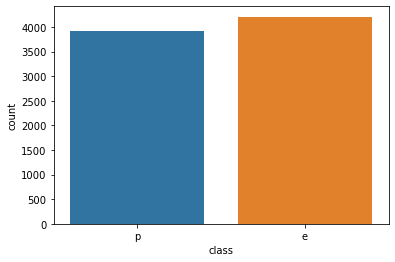

In [10]:
sns.countplot(mushroom['class']);

All the 2 classes are almost equally distributed. There is no class imbalance issue exists.

In [11]:
mushroom = mushroom.astype('category')
mushroom.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

We need to change categorical data to numerical data , by Label Encoder technique. Before using that approach we have to change the object datatype into "category" datatype. Here we changed the object dtype to "category" dtype.

In [12]:
le = LabelEncoder()
for column in mushroom.columns:
    mushroom[column]=le.fit_transform(mushroom[column])
mushroom    

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


We have changed categorical data to ordinal values. Also it looks like the column "veil-type" is 0. 

In [13]:
mushroom['veil-type']

0       0
1       0
2       0
3       0
4       0
       ..
8119    0
8120    0
8121    0
8122    0
8123    0
Name: veil-type, Length: 8124, dtype: int32

The column "veil-type" is 0 and it is not contributing to data so we will remove it.

In [14]:
mushroom = mushroom.drop(["veil-type"], axis=1)

We dropped the column "veil-type"

<AxesSubplot:xlabel='cap-shape'>

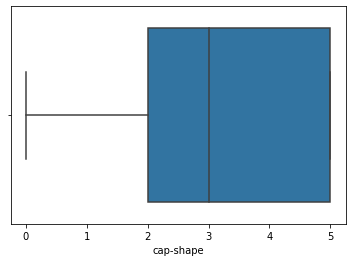

In [15]:
sns.boxplot(mushroom["cap-shape"])

There are no outliers in column "cap-shape"

<AxesSubplot:xlabel='cap-surface'>

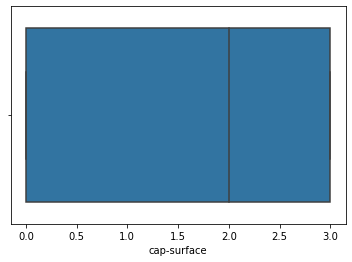

In [16]:
sns.boxplot(mushroom["cap-surface"])

There are no outliers in column "cap-surface".

<AxesSubplot:xlabel='cap-color'>

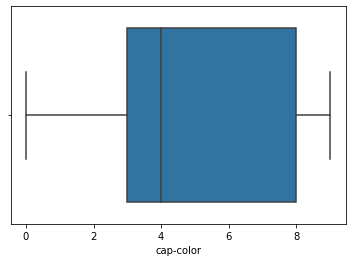

In [17]:
sns.boxplot(mushroom["cap-color"])

There are no outliers in column "cap-color"

<AxesSubplot:xlabel='bruises'>

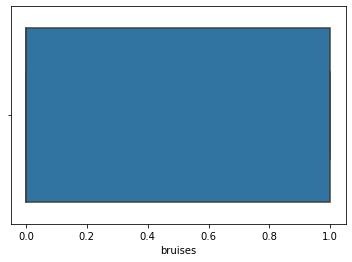

In [18]:
sns.boxplot(mushroom["bruises"])

There are no any outliers i column "bruises".

<AxesSubplot:xlabel='odor'>

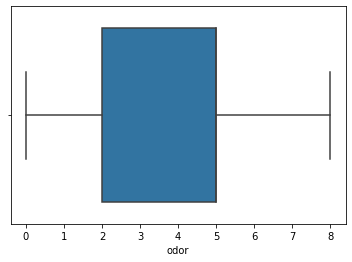

In [19]:
sns.boxplot(mushroom["odor"])

There are no outliers in column "odor".

<AxesSubplot:xlabel='gill-attachment'>

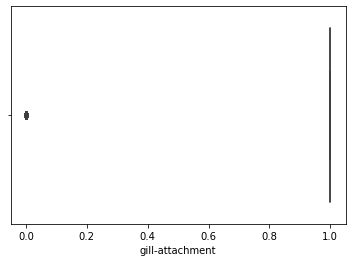

In [20]:
sns.boxplot(mushroom["gill-attachment"])

There are outliers in "gill-attachment" column.

<AxesSubplot:xlabel='gill-spacing'>

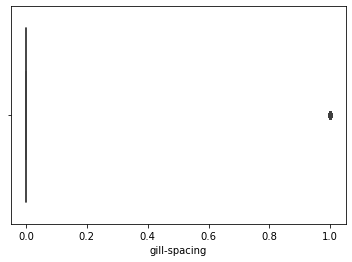

In [21]:
sns.boxplot(mushroom["gill-spacing"])

There are outliers in "gill-spacing" column.

<AxesSubplot:xlabel='gill-size'>

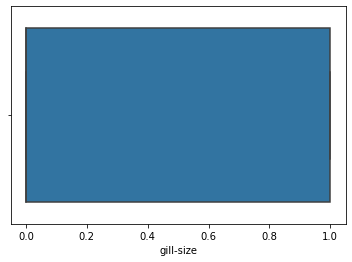

In [22]:
sns.boxplot(mushroom["gill-size"])

There are no outliers in column "gill-size".

<AxesSubplot:xlabel='gill-color'>

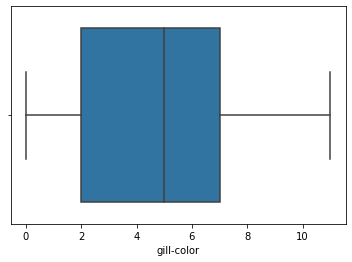

In [23]:
sns.boxplot(mushroom["gill-color"])

There are no outliers in column "gill-color".

<AxesSubplot:xlabel='stalk-shape'>

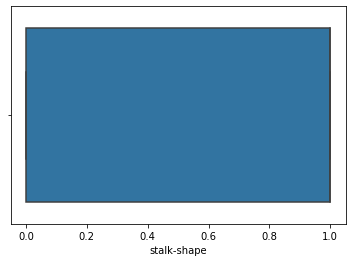

In [24]:
sns.boxplot(mushroom["stalk-shape"])

There are no outliers in column "stalk-shape".

<AxesSubplot:xlabel='stalk-root'>

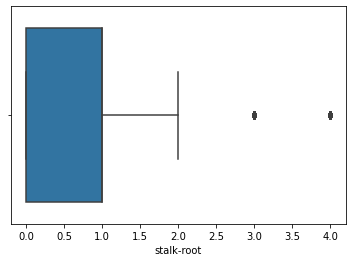

In [25]:
sns.boxplot(mushroom["stalk-root"])

There are few outliers in column "stalk-root"

<AxesSubplot:xlabel='stalk-surface-above-ring'>

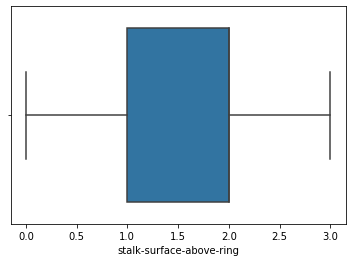

In [26]:
sns.boxplot(mushroom["stalk-surface-above-ring"])

There are no outliers in column "stalk-surface-above-ring".

<AxesSubplot:xlabel='stalk-surface-below-ring'>

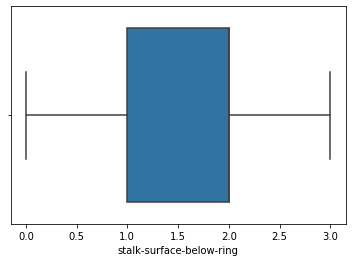

In [27]:
sns.boxplot(mushroom["stalk-surface-below-ring"])

There are no outliers in column "stalk-surface-below-ring".

<AxesSubplot:xlabel='stalk-color-above-ring'>

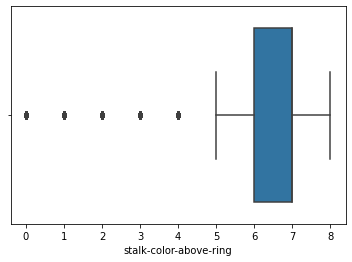

In [28]:
sns.boxplot(mushroom["stalk-color-above-ring"])

There are many outliers present in "stalk-color-above-ring" column.

<AxesSubplot:xlabel='stalk-color-below-ring'>

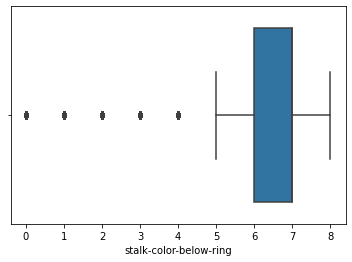

In [29]:
sns.boxplot(mushroom["stalk-color-below-ring"])

There are many outliers present in "stalk-color-below-ring"

<AxesSubplot:xlabel='veil-color'>

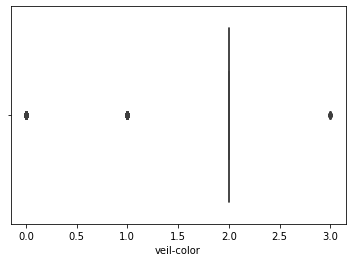

In [30]:
sns.boxplot(mushroom["veil-color"])

There are many outliers in "veil-color" column.

<AxesSubplot:xlabel='ring-number'>

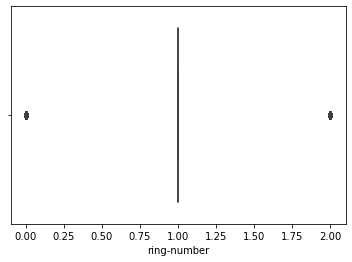

In [31]:
sns.boxplot(mushroom["ring-number"])

There are outliers in "ring-number" column.

<AxesSubplot:xlabel='ring-type'>

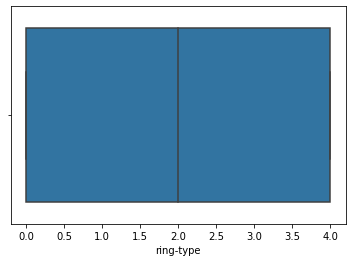

In [32]:
sns.boxplot(mushroom["ring-type"])

There are no outliers in column "ring-type".

<AxesSubplot:xlabel='spore-print-color'>

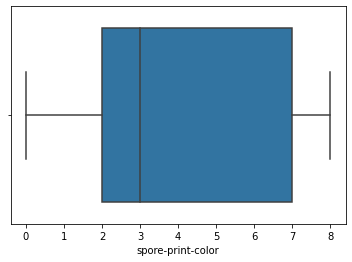

In [33]:
sns.boxplot(mushroom["spore-print-color"])

There are no outliers in column "spore-print-color".

<AxesSubplot:xlabel='population'>

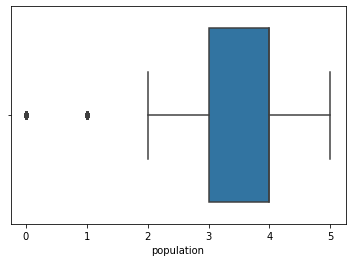

In [34]:
sns.boxplot(mushroom["population"])

There are few outliers in "population" color.

<AxesSubplot:xlabel='habitat'>

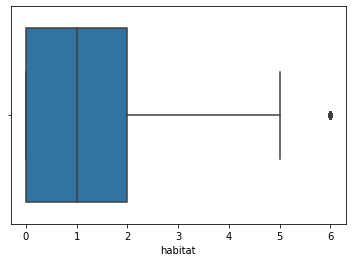

In [35]:
sns.boxplot(mushroom["habitat"])

There are few ouliers in "habitat" column.

Since the data is categorical. There's no need to treat the Outliers.

# Bivariate Analysis

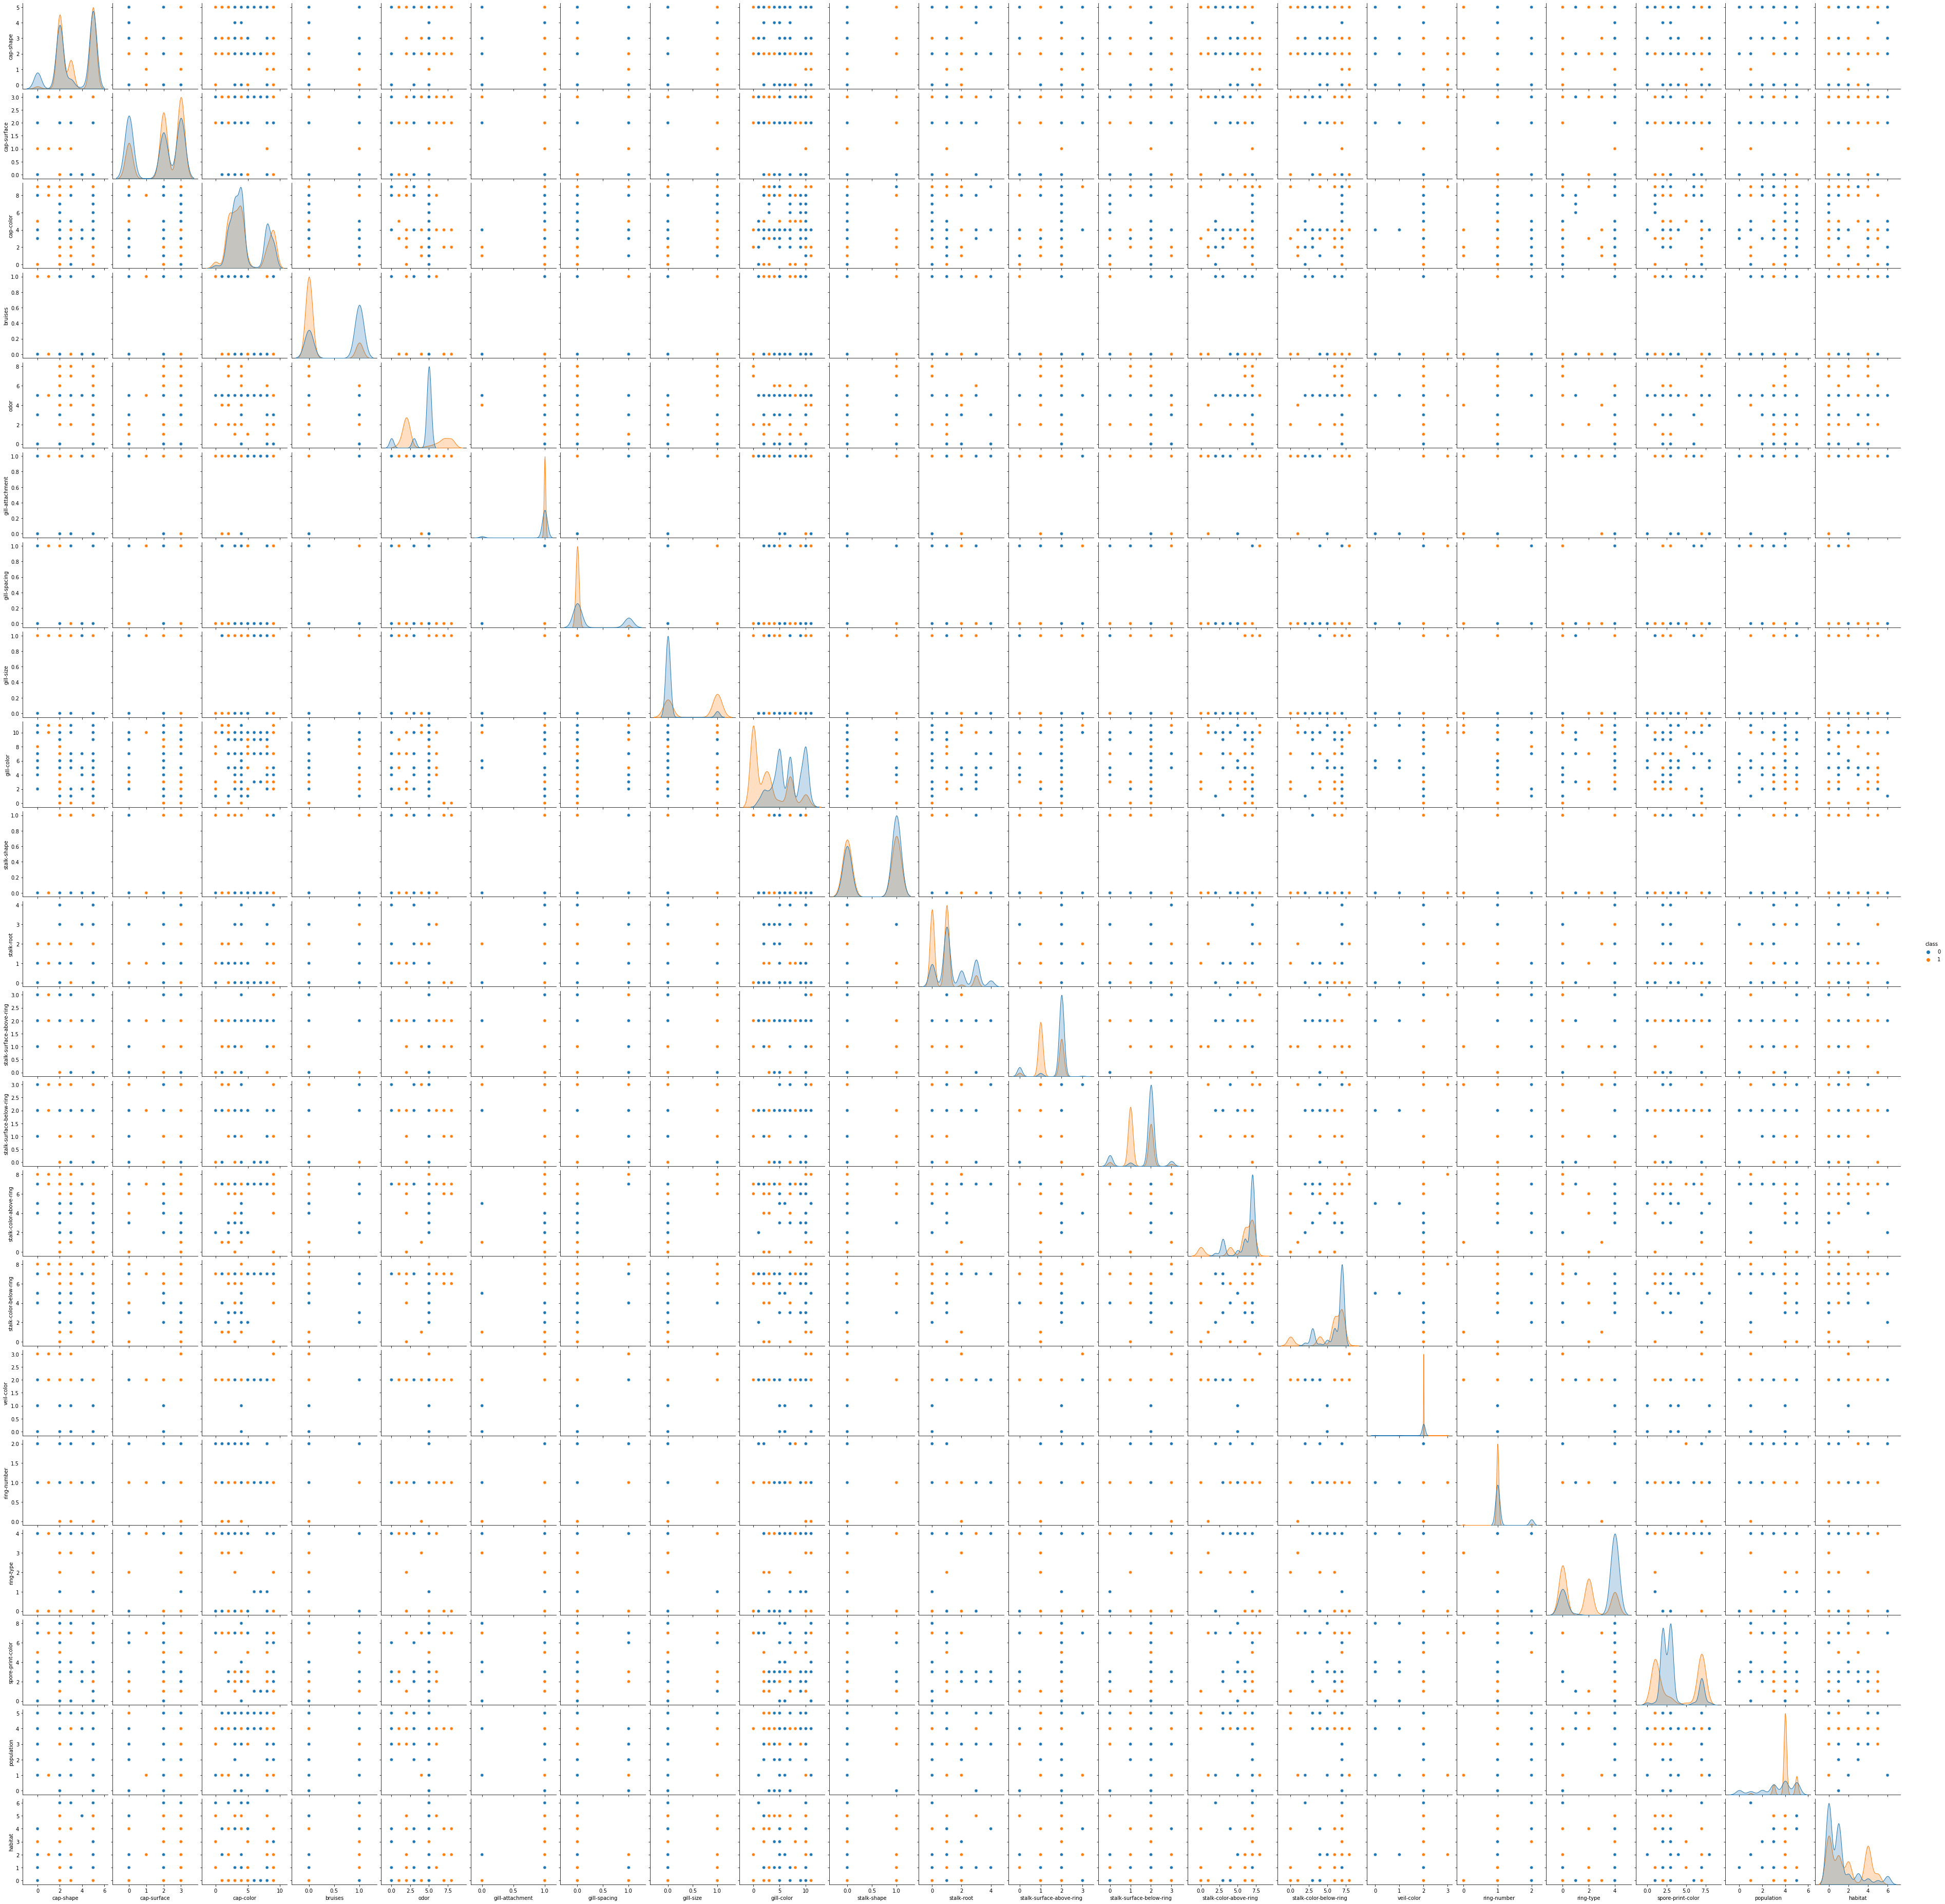

In [36]:
sns.pairplot(mushroom,hue="class")

It gives us the distribution of single variable and the relationship between both the variables.

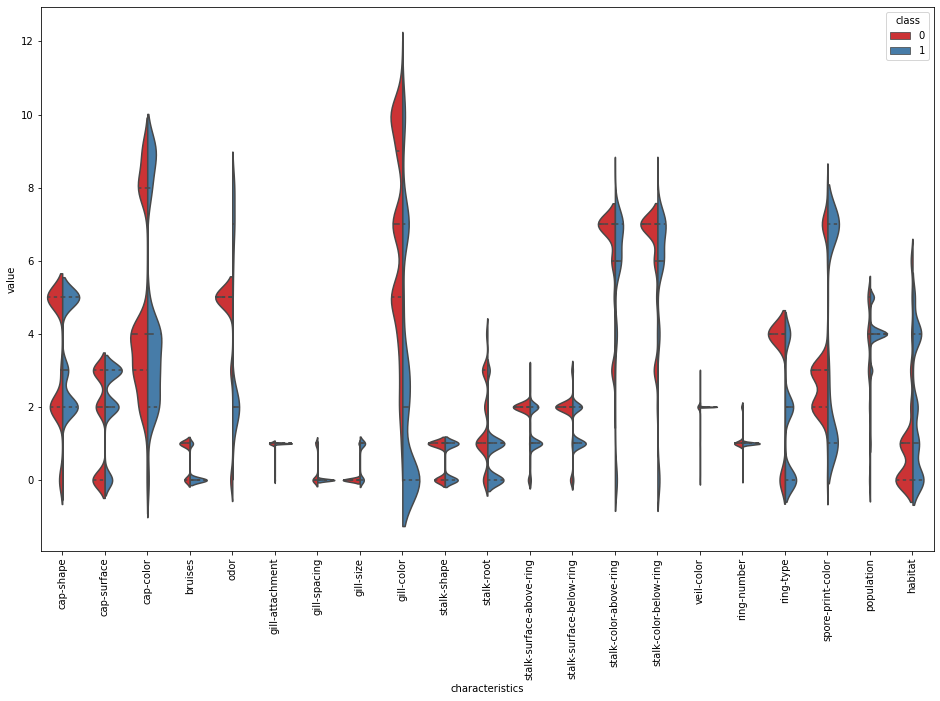

In [37]:
mushroom_div = pd.melt(mushroom, "class", var_name="characteristics")
plt.figure(figsize=(16,10))
v=sns.violinplot(x="characteristics",y="value",hue="class",split=True,data=mushroom_div,inner='quartile',palette='Set1')
mushroom_no_class = mushroom.drop(["class"],axis=1)
v.set_xticklabels(rotation=90,labels=list(mushroom_no_class.columns));

It represents the distribution of classification characteristics. Here the column "gill-color" breaks into two parts which may be of some significance in the classification.

# Multivariate Analysis

<AxesSubplot:>

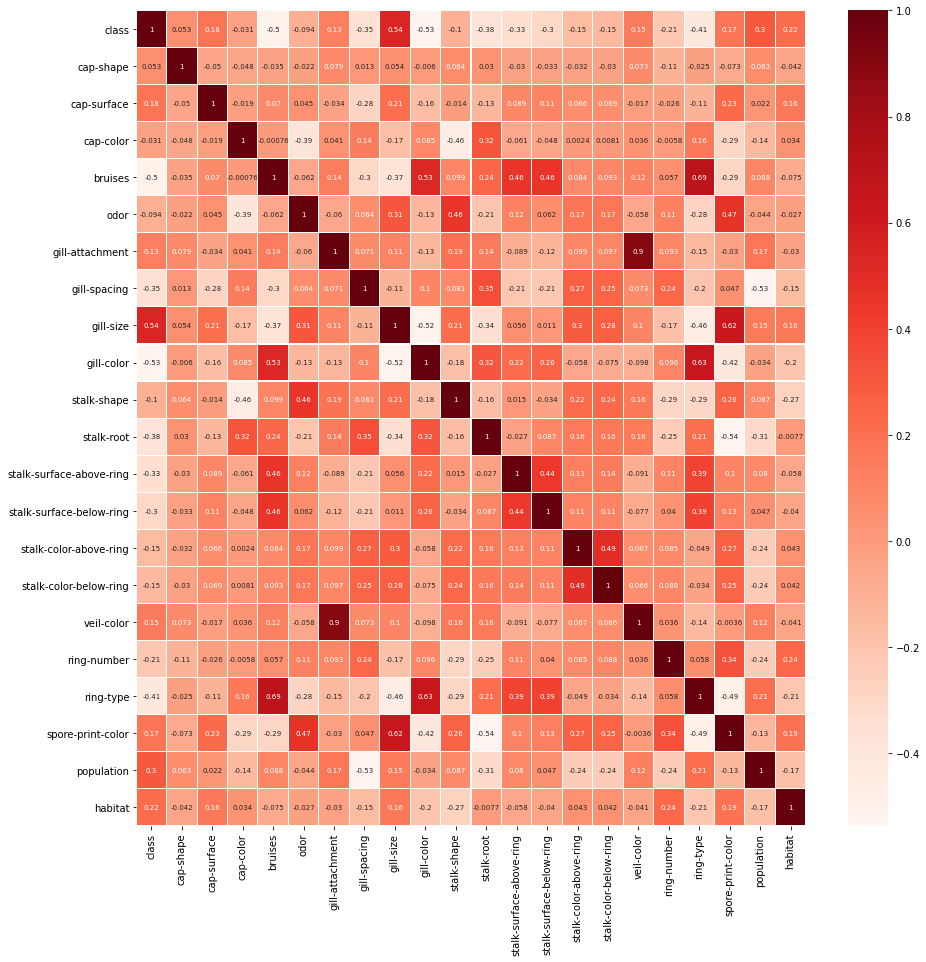

In [38]:
plt.figure(figsize=(15,15))
sns.heatmap(mushroom.corr(), linewidths=.1, cmap="Reds", annot=True, annot_kws={"size":7})

The heatmap gives the correlation between the variables. "gill-color" is the least correlating variable. "gill-color" is -0.53. The least correlating variable is most important in classification. 
Also, no multicolinearity exist in the dataset.

The data is categorical, hence no need to remove outliers.

# Skewness

In [39]:
mushroom.skew()

class                       0.071946
cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                   0.706965
bruises                     0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.947852
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
veil-color                 -6.946944
ring-number                 2.701657
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.985548
dtype: float64

Since the data is categorical, There's no need to treat the skewness.

In [40]:
x=mushroom.drop("class",axis=1)
y=mushroom["class"]

Setting x and y axis. Since We have to predict the class, we are dropping "class" column.

# Classification Methods

# 1. Decision Tree Classification

In [41]:
dt = DecisionTreeClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

1.0
[[1257    0]
 [   0 1181]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



The accuracy of DecisionTreeClassifier is 100% 

# 2. Random Forest Classifier

In [42]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

1.0
[[1257    0]
 [   0 1181]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



The Accuracy of RandomForestClassifier Is 100%.

# 3. SVC

In [43]:
sv = SVC()
sv.fit(x_train,y_train)
sv.score(x_train,y_train)
predsv=sv.predict(x_test)
print(accuracy_score(y_test,predsv))
print(confusion_matrix(y_test,predsv))
print(classification_report(y_test,predsv))

0.9901558654634947
[[1254    3]
 [  21 1160]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1257
           1       1.00      0.98      0.99      1181

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438



The accuracy of SVc is 99 %

# 4. KNeighborsClassifier()

In [44]:
kn = KNeighborsClassifier(n_neighbors=5)
kn.fit(x_train,y_train)
kn.score(x_train,y_train)
predkn=kn.predict(x_test)
print(accuracy_score(y_test,predkn))
print(confusion_matrix(y_test,predkn))
print(classification_report(y_test,predkn))

0.9958982772764561
[[1248    9]
 [   1 1180]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1257
           1       0.99      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



The accuracy of KneighborsClassifier is 100 %

# Mean Cross_Val_Score

In [45]:
from sklearn.model_selection import cross_val_score as cvs

In [46]:
print(cvs(dt,x,y,cv=5).mean())

0.9330146267525578


The mean cross_val_score of DecisionTreeClassifier is 91.9%. The difference between accuracy and cvs is 8.1

In [47]:
print(cvs(rf,x,y,cv=5).mean())

0.8885661993179236


THe mean cross_val_score of RandomForestClassifier is 89.25% . The difference between accuracy and cvs is 10.75

In [48]:
print(cvs(sv,x,y,cv=5).mean())

0.8420306934444864


The mean cross_val_score of SVC is 84.20%. The difference between accuracy and cvs is 14.80

In [49]:
print(cvs(kn,x,y,cv=5).mean())

0.8808163698370594


The mean cross_val_score of KNeighborsClassifier is 88.08%. The difference between accuracy and cvs is 11.92

Hence our best model is Decision tree classifier as it has the least difference.

# Hyper Parameter Tuning

In [50]:
from sklearn.model_selection import GridSearchCV

importing the best approach for hyper parameter tuning

In [51]:
parameter = {'max_depth':np.arange(2,10),
            'criterion':['gini','entropy'],
            'splitter':['best','random'],
            'max_features':['auto','sqrt','log2']}

In [52]:
gvc = GridSearchCV(DecisionTreeClassifier(),parameter,cv=5)

In [53]:
gvc.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [54]:
gvc.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'auto',
 'splitter': 'best'}

We have found the best parameters to pass in DecisionTreeClassifier

In [55]:
Final_model = DecisionTreeClassifier(criterion='entropy',max_depth=8,max_features='auto',splitter='random')
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

98.89253486464314


We have applied hyper parameter tuning on DecisionTreeClassifier

# Saving The Best Model

In [56]:
import joblib
joblib.dump(Final_model,"FinalModel.pkl")

['FinalModel.pkl']

The final model has been saved